<a href="https://colab.research.google.com/github/SkyJoyTianle/python/blob/master/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第六章

例83

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA
# style.use("seaborn-ticks")

In [ ]:
def m(x):
    return 0

def k(x, y):
    return np.exp(-(x-y)**2/2)

def gp_sample(x, m, k):
    n = len(x)
    m_x = m(x)
    k_xx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            k_xx[i, j] = k(x[i], x[j])
    R = np.linalg.cholesky(k_xx) #lower triangular matrix
    u = np.random.randn(n)
    return R.dot(u) + m_x

In [ ]:
x = np.arange(-2, 3, 1)
n = len(x)
r = 100
z = np.zeros((r, n))
for i in range(r):
    z[i, :] = gp_sample(x, m, k)
k_xx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        k_xx[i, j] = k(x[i], x[j])

print("cov(z):\n",np.cov(z),"\n")
print("k_xx:\n",k_xx)

cov(z):
 [[ 2.00809821  0.11921263 -0.11221682 ... -0.05193605 -0.84334487
   0.97731204]
 [ 0.11921263  0.53942729 -0.18734565 ...  0.36052937  0.31635813
  -0.08658549]
 [-0.11221682 -0.18734565  0.18921089 ... -0.06993975 -0.19047716
   0.17492226]
 ...
 [-0.05193605  0.36052937 -0.06993975 ...  0.30063543  0.22706885
  -0.03366518]
 [-0.84334487  0.31635813 -0.19047716 ...  0.22706885  0.7119769
  -0.67694455]
 [ 0.97731204 -0.08658549  0.17492226 ... -0.03366518 -0.67694455
   0.79056296]] 

k_xx:
 [[1.00000000e+00 6.06530660e-01 1.35335283e-01 1.11089965e-02
  3.35462628e-04]
 [6.06530660e-01 1.00000000e+00 6.06530660e-01 1.35335283e-01
  1.11089965e-02]
 [1.35335283e-01 6.06530660e-01 1.00000000e+00 6.06530660e-01
  1.35335283e-01]
 [1.11089965e-02 1.35335283e-01 6.06530660e-01 1.00000000e+00
  6.06530660e-01]
 [3.35462628e-04 1.11089965e-02 1.35335283e-01 6.06530660e-01
  1.00000000e+00]]


例 84

In [ ]:
def m(x):
    return 0

def k(x, y):
    return np.exp(-np.sum((x-y)**2)/2)

def gp_sample(x, m, k):
    n = x.shape[0]
    m_x = m(x)
    k_xx = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            k_xx[i, j] = k(x[i], x[j])
    R = np.linalg.cholesky(k_xx) #lower triangular matrix
    u = np.random.randn(n)
    return R.dot(u) + m_x

In [ ]:
n = 5
r = 100
z = np.zeros((r, n))
for i in range(r):
    z[i, :] = gp_sample(x, m, k)
k_xx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        k_xx[i, j] = k(x[i], x[j])

print("cov(z):\n",np.cov(z),"\n")
print("k_xx:\n",k_xx)

cov(z):
 [[ 0.28851577 -0.22499047 -0.01101346 ...  0.394345   -0.00545191
  -0.53235548]
 [-0.22499047  1.17627247  0.03587548 ... -1.15093234  0.35032277
   1.09253224]
 [-0.01101346  0.03587548  0.02426058 ... -0.02316861 -0.01368806
   0.05723843]
 ...
 [ 0.394345   -1.15093234 -0.02316861 ...  1.47731275 -0.230646
  -1.33749426]
 [-0.00545191  0.35032277 -0.01368806 ... -0.230646    0.17531139
   0.20616228]
 [-0.53235548  1.09253224  0.05723843 ... -1.33749426  0.20616228
   1.46738071]] 

k_xx:
 [[1.00000000e+00 6.06530660e-01 1.35335283e-01 1.11089965e-02
  3.35462628e-04]
 [6.06530660e-01 1.00000000e+00 6.06530660e-01 1.35335283e-01
  1.11089965e-02]
 [1.35335283e-01 6.06530660e-01 1.00000000e+00 6.06530660e-01
  1.35335283e-01]
 [1.11089965e-02 1.35335283e-01 6.06530660e-01 1.00000000e+00
  6.06530660e-01]
 [3.35462628e-04 1.11089965e-02 1.35335283e-01 6.06530660e-01
  1.00000000e+00]]


命題 63

In [ ]:
def gp_1(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    R = np.linalg.inv(K + sigma_2*np.identity(n))
    mm = mu(x_pred) + np.dot(np.dot(h.T, R), (y-mu(x)))
    ss = k(x_pred, x_pred) - np.dot(np.dot(h.T, R), h)
    return {"mm":mm, "ss":ss}

def gp_2(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    L = np.linalg.cholesky(K + sigma_2*np.identity(n))
    alpha = np.linalg.solve(L, np.linalg.solve(L.T, (y - mu(x))))
    mm = mu(x_pred) + np.sum(np.dot(h.T, alpha))
    gamma = np.linalg.solve(L.T, h)
    ss = k(x_pred, x_pred) - np.sum(gamma**2)
    return {"mm":mm, "ss":ss}

In [ ]:
sigma_2 = 0.2

def k(x, y):
    return np.exp(-(x - y)**2 / 2 / sigma_2)

def mu(x):
    return x

time1 = 0.004522085189819336
time2 =  0.004988431930541992


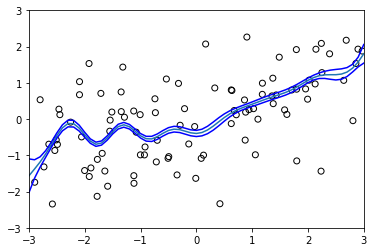

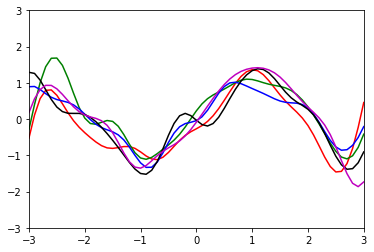

In [ ]:
n = 100
x = np.random.uniform(size = n) * 6 - 3
y = np.sin(x / 2) + np.random.randn(n)
K = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i], x[j])
# count
import time

start1 = time.time()
gp_1(0)
end1 = time.time()
print("time1 =", end1-start1)

start2 = time.time()
gp_2(0)
end2 = time.time()
print("time2 = ", end2-start2)

u_seq = np.arange(-3, 3.1, 0.1)
v_seq = []; w_seq = []
for u in u_seq:
    res = gp_1(u)
    v_seq.append(res["mm"])
    w_seq.append(res["ss"])

plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x, y, facecolors='none', edgecolors = "k", marker = "o")
plt.plot(u_seq, v_seq)
plt.plot(u_seq, np.sum([v_seq, [i * 3 for i in w_seq]], axis = 0), c = "b")
plt.plot(u_seq, np.sum([v_seq, [i * (-3) for i in w_seq]], axis = 0), c = "b")
plt.show()

n = 100
plt.figure()
plt.xlim(-3, 3)
plt.ylim(-3, 3)

color = ["r", "g", "b", "k", "m"]

for h in range(5):
    x = np.random.uniform(size = n) * 6 - 3
    y = np.sin(np.pi * x / 2) + np.random.randn(n)
    sigma_2 = 0.2
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(x[i], x[j])
    u_seq = np.arange(-3, 3.1, 0.1)
    v_seq = []
    for u in u_seq:
        res = gp_1(u)
        v_seq.append(res["mm"])
    plt.plot(u_seq, v_seq, c = color[h])

例 86

In [ ]:
from sklearn.datasets import load_iris
df = load_iris()
x = df.data[0:100, 0:4]
y = np.array([1]*50 + [-1]*50)
n = len(y)
def k(x, y):
    return np.exp(np.sum(-(x - y)**2) / 2)

K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i, :], x[j, :])
eps = 0.00001
f = [0] * n
g = [0.1] * n


In [ ]:
while np.sum((np.array(f)-np.array(g))**2) > eps:
    i = i + 1
    g = f
    f = np.array(f)
    y = np.array(y)
    v = np.exp(-y*f)
    u = y * v / (1 + v)
    w = (v / (1 + v)**2)
    W = np.diag(w)
    W_p = np.diag(w**0.5)
    W_m = np.diag(w**(-0.5))
    L = np.linalg.cholesky(np.identity(n)+np.dot(np.dot(W_p, K), W_p))
    gamma = W.dot(f) + u
    beta = np.linalg.solve(L, np.dot(np.dot(W_p, K), gamma))
    alpha = np.linalg.solve(np.dot(L.T, W_m), beta)
    f = np.dot(K, (gamma-alpha))

print(list(f))

[2.901759772850691, 2.666187741064813, 2.735999714975541, 2.5962146616446793, 2.8888259653434907, 2.422990428907574, 2.712837065329872, 2.8965829899125066, 2.263839959450692, 2.7227941550187085, 2.6757868220665566, 2.8042769128993403, 2.629916582197862, 2.12905887559897, 1.9947371858903626, 1.7255773341842828, 2.502403800007299, 2.8947679485211673, 2.211715451090947, 2.757888745442485, 2.580702500016766, 2.788433500299371, 2.4501472162360978, 2.5982525661071585, 2.4936329147745706, 2.5892721299617927, 2.799560313260202, 2.854337885531594, 2.858033632605153, 2.6821983117114163, 2.6631803480277263, 2.652951517009174, 2.409809417765029, 2.157028890674796, 2.738196179682447, 2.7775073555227343, 2.6054932709605594, 2.8486244905053546, 2.3426363607041476, 2.882682598131894, 2.887406385036485, 1.5619169890351743, 2.454169361467093, 2.64939855108404, 2.407116571781232, 2.6339060760765287, 2.727124019609395, 2.6732162909902857, 2.749570997237667, 2.8842884221129195, -1.8704417638885944, -2.5373

In [ ]:
def pred(z):
    kk = np.zeros(n)
    for i in range(n):
        kk[i] = k(z, x[i, :])
    mu = np.sum(kk * u)
    alpha = np.linalg.solve(L, np.dot(W_p, kk))
    sigma2 = k(z, z) - np.sum(alpha**2)
    m = 1000
    b = np.random.normal(mu, sigma2, size = m)
    pi = np.sum((1 + np.exp(-b))**(-1)) / m
    return pi

In [ ]:
z = np.zeros(4)
for j in range(4):
    z[j] = np.mean(x[:50, j])
pred(z)

0.946376613276904

In [ ]:
for j in range(4):
    z[j] = np.mean(x[50:100, j])
pred(z)

0.05301765489687672

例 88

In [ ]:
sigma_2 = 0.05

def k(x, y):
    return np.exp(-(x - y)**2 / 2 / sigma_2)

def mu(x):
    return x

n = 200
x = np.random.uniform(size = n) * 6 - 3
y = np.sin(x / 2) + np.random.randn(n)
eps = 10**(-6)

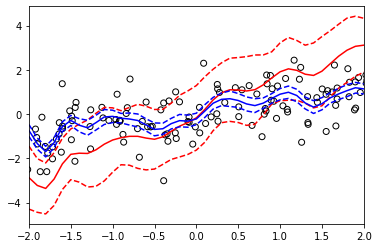

In [ ]:
m = 100
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = k(x[i], x[j])
index = np.random.choice(n, size = m, replace = False)
z = x[index]
m_x = 0
m_z = 0
K_zz = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K_zz[i, j] = k(z[i], z[j])

K_xz = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        K_xz[i, j] = k(x[i], z[j])
K_zz_inv = np.linalg.inv(K_zz + np.diag([10**eps]*m))
lam = np.zeros(n)
for i in range(n):
    lam[i] = k(x[i], x[i]) - np.dot(np.dot(K_xz[i, 0:m], K_zz_inv), K_xz[i, 0:m])
lam_0_inv = np.diag(1/(lam+sigma_2))
Q = K_zz + np.dot(np.dot(K_xz.T, lam_0_inv), K_xz)
Q_inv = np.linalg.inv(Q + np.diag([eps] * m))
muu = np.dot(np.dot(np.dot(Q_inv, K_xz.T), lam_0_inv), y-m_x)
dif = K_zz_inv - Q_inv
R = np.linalg.inv(K + sigma_2 * np.identity(n))

def gp_ind(x_pred):
    h = np.zeros(m)
    for i in range(m):
        h[i] = k(x_pred, z[i])
    mm = mu(x_pred) + h.dot(muu)
    ss = k(x_pred, x_pred) - h.dot(dif).dot(h)
    return {"mm": mm, "ss": ss}

def gp_1(x_pred):
    h = np.zeros(n)
    for i in range(n):
        h[i] = k(x_pred, x[i])
    mm = mu(x_pred) + np.dot(np.dot(h.T, R), y-mu(x))
    ss = k(x_pred, x_pred) - np.dot(np.dot(h.T, R), h)
    return {"mm": mm, "ss": ss}

x_seq = np.arange(-2, 2.1, 0.1)
mmv = []; ssv = []
for u in x_seq:
    mmv.append(gp_ind(u)["mm"])
    ssv.append(gp_ind(u)["ss"])

plt.figure()
plt.plot(x_seq, mmv, c = "r")
plt.plot(x_seq, np.array(mmv) + 3 * np.sqrt(np.array(ssv)),
         c = "r", linestyle = "--")
plt.plot(x_seq, np.array(mmv) - 3 * np.sqrt(np.array(ssv)),
         c = "r", linestyle = "--")
plt.xlim(-2, 2)
plt.plot(np.min(mmv), np.max(mmv))

x_seq = np.arange(-2, 2.1, 0.1)
mmv = []; ssv =[]
for u in x_seq:
    mmv.append(gp_1(u)["mm"])
    ssv.append(gp_1(u)["ss"])

mmv = np.array(mmv)
ssv = np.array(ssv)

plt.plot(x_seq, mmv, c = "b")
plt.plot(x_seq, mmv + 3 * np.sqrt(ssv), c = "b", linestyle = "--")
plt.plot(x_seq, mmv - 3 * np.sqrt(ssv), c = "b", linestyle = "--")
plt.scatter(x, y, facecolors='none', edgecolors = "k", marker = "o")


例 89

Text(0.5, 1.0, 'Brown Motion')

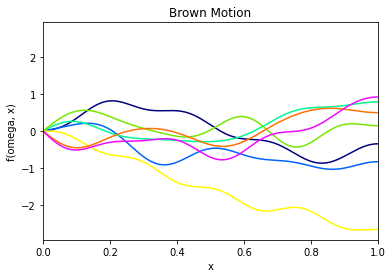

In [ ]:
# Eigenvalue
def lam(j):
    return 4 / ((2 * j - 1) * np.pi)**2
# EigenFunction
def ee(j, x):
    return np.sqrt(2) * np.sin((2 * j - 1) * np.pi / 2 * x)

n = 10; m = 7

# Definition of Gaussian Process
def f(z, x):
    n = len(z)
    S = 0
    for i in range(n):
        S = S + z[i] * ee(i, x) * np.sqrt(lam(i))
    return S

plt.figure()
plt.xlim(0, 1)
plt.xlabel("x")
plt.ylabel("f(omega, x)")
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
colors = [colormap(i) for i in np.linspace(0, 0.8, m)]

for j in range(m):
    z = np.random.randn(n)
    x_seq = np.arange(0, 3.001, 0.001)
    y_seq = []
    for x in x_seq:
        y_seq.append(f(z, x))
    plt.plot(x_seq, y_seq, c = colors[j])

plt.title("Brown Motion")


In [ ]:
from scipy.special import gamma

def matern(nu, l, r):
    p = nu - 1 / 2
    S = 0
    for i in range(int(p+1)):
        S = S + gamma(p + i + 1) / gamma(i + 1) / gamma(p - i + 1)\
        * (np.sqrt(8 * nu) * r / l)**(p - i)
    S = S * gamma(p + 2) / gamma(2 * p + 1) * np.exp(-np.sqrt(2 * nu) * r / l)
    return S

例 90

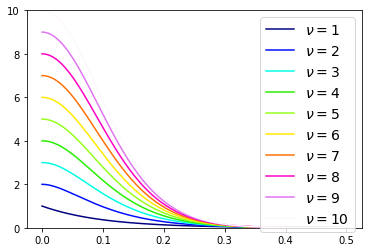

In [ ]:
m = 10
l = 0.1
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
color = [colormap(i) for i in np.linspace(0, 1, len(range(m)))]

x = np.linspace(0, 0.5, 200)
plt.plot(x, matern(1 - 1/2, l, x), c = color[0], label = r"$\nu=%d$"%1)
plt.ylim(0, 10)
for i in range(2, m + 1):
    plt.plot(x, matern(i - 1/2, l, x), c = color[i - 1], label = r"$\nu=%d$"%i)

plt.legend(loc = "upper right", frameon = True, prop={'size':14})

例 91

Text(0.5, 1.0, 'Matern process (nu = 3/2, l = 0.1)')

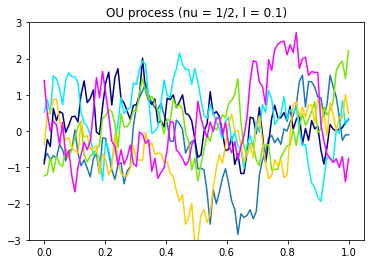

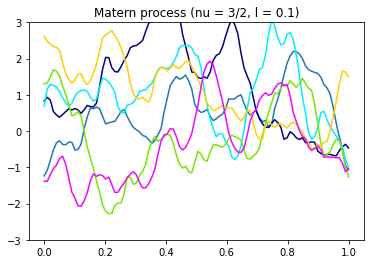

In [ ]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
colors = [colormap(i) for i in np.linspace(0, 0.8, 5)]

def rand_100(Sigma):
    L = np.linalg.cholesky(Sigma)
    u = np.random.randn(100)
    y = L.dot(u)
    return y

x = np.linspace(0, 1, 100)
z = np.abs(np.subtract.outer(x,x))
l = 0.1

Sigma_OU = np.exp(-z / l)
y = rand_100(Sigma_OU)

plt.figure()
plt.plot(x, y)
plt.ylim(-3,3)
for i in range(5):
    y = rand_100(Sigma_OU)
    plt.plot(x, y, c = colors[i])
plt.title("OU process (nu = 1/2, l = 0.1)")

Sigma_M = matern(3/2, l, z)
y = rand_100(Sigma_M)
plt.figure()
plt.plot(x, y)
plt.ylim(-3, 3)
for i in range(5):
    y = rand_100(Sigma_M)
    plt.plot(x, y, c = colors[i])
plt.title("Matern process (nu = 3/2, l = 0.1)")

例 92

In [ ]:
#install scikit-fda for the Canadian Weather Dataset
!pip install scikit-fda

In [ ]:
import skfda
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, scale

In [ ]:
X, y = skfda.datasets.fetch_weather(return_X_y=True, as_frame=True)
df = X.iloc[:, 0].values
def g(j, x):
    if j == 0:
        return 1 / np.sqrt(2 * np.pi)
    if j % 1 == 0:
        return np.cos((j // 2) * x) / np.sqrt(np.pi)
    else:
        return np.sin((j // 2) * x) / np.sqrt(np.pi)

def beta(x, y):
    X = np.zeros((N, p))
    for i in range(N):
        for j in range(p):
            X[i, j] = g(j, x[i])
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)
                        + 0.0001*np.identity(p)), X.T), y)
    return np.squeeze(beta)

N = 365; n = 35; m = 5; p = 100; df = df.coordinates[0].data_matrix
C = np.zeros((n, p))
for i in range(n):
    x = np.arange(1, N+1) * (2 * np.pi / N) - np.pi
    y = df[i]
    C[i, :] = beta(x, y)

pca = PCA()
pca.fit(C)
B = pca.components_.T
xx = C.dot(B)

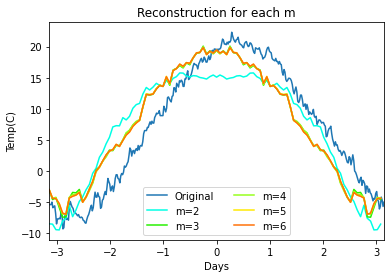

In [ ]:
def z(i, m, x):
    S = 0
    for j in range(p):
        for k in range(m):
            for r in range(p):
                S = S + C[i, j] * B[j, k] * B[r, k] * g(r, x)
    return S

x_seq = np.arange(-np.pi, np.pi, 2 * np.pi / 100)
plt.figure()
plt.xlim(-np.pi, np.pi)
# plt.ylim(-15, 25)
plt.xlabel("Days")
plt.ylabel("Temp(C)")
plt.title("Reconstruction for each m")
plt.plot(x, df[13], label = "Original")
for m in range(2, 7):
    plt.plot(x_seq, z(13, m, x_seq), c = color[m], label = "m=%d"%m)
plt.legend(loc = "lower center", ncol = 2)

Text(0.5, 1.0, 'Ratio')

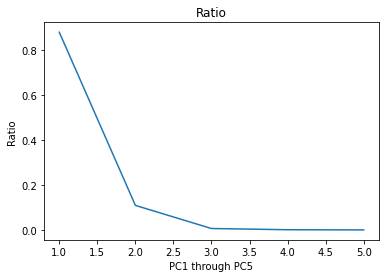

In [ ]:
lam = pca.explained_variance_
ratio = lam / sum(lam) # Or use pca.explained_variance_ratio_
plt.plot(range(1, 6), ratio[:5])
plt.xlabel("PC1 through PC5")
plt.ylabel("Ratio")
plt.title("Ratio")

[[-5.17047156e-01 -2.43880782e-01  7.48988279e-02 ...  5.48412387e-04
  -1.22748578e-03  8.07866592e-01]
 [-7.31215100e-01 -3.44899509e-01  1.05922938e-01 ...  7.75572240e-04
  -1.73592707e-03 -5.71437836e-01]
 [ 3.13430279e-01 -6.12932605e-01  1.50738649e-01 ... -6.99018707e-03
   1.19586600e-03 -5.41866413e-02]
 ...
 [ 3.08129173e-05 -2.83373696e-03  8.28893867e-03 ...  1.35931675e-01
  -2.34867483e-01  1.23616273e-03]
 [ 1.47021532e-03  3.25749669e-03 -4.83933350e-03 ... -1.32596334e-01
   1.60270831e-01  8.94103792e-03]
 [ 1.47021531e-03  3.25749669e-03 -4.83933350e-03 ... -1.32596334e-01
   1.60270831e-01 -1.17997796e-02]]


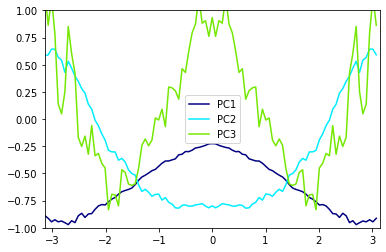

In [ ]:
def h(coef, x):
    S = 0
    for j in range(p):
        S = S + coef[j] * g(j, x)
    return S
print(B)
plt.figure()
plt.xlim(-np.pi, np.pi)
plt.ylim(-1, 1)
for j in range(3):
    plt.plot(x_seq, h(B[:, j], x_seq), c = colors[j], label = "PC%d"%(j+1))
plt.legend(loc = "best")

['Q', 'M', 'O', 'T', 'W', 'C', 'V', 'V']


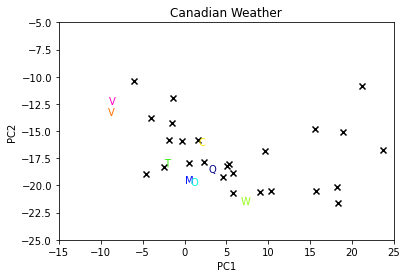

In [ ]:
place = X.iloc[:, 1]
index = [9, 11, 12, 13, 16, 23, 25, 26]
others = [x for x in range(34) if x not in index]
first = [place[i][0] for i in index]
print(first)
plt.figure()
plt.xlim(-15, 25)
plt.ylim(-25, -5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Canadian Weather")
plt.scatter(xx[others, 0], xx[others, 1], marker = "x", c = "k")
for i in range(8):
    l = plt.text(xx[index[i], 0], xx[index[i], 1],
             s = first[i], c = color[i])
